In [1]:
import sys
sys.path.append('../')
sys.path.append('old/')
import numpy as np
import pylab as pl
from scipy import rand
from scipy.constants import e, epsilon_0

import geom_impact_poly as poly


In [2]:
import backwards_compatibility_1_02 as bw

pycuda not found. no gpu capabilities will be available
pycuda not found. no gpu capabilities will be available
GPU libraries (pycuda, cusolver_RF) not found. GPU functionality not available.


In [3]:
na = np.array
Dh =1e-1
N_part_gen = 100000

tree = [[0,0],
		[1.,0],
		[1., 1,],
		[5.,1.],
		[2.,4.],
		[4,4],
		[2,7],
		[3,7],
		[1,9],
		[2,9],
		[0,11]]
		
tree=np.array(tree)
x_tree = tree[:,0]
y_tree = tree[:,1]

y_tree -= 6.

x_aper = 6.
y_aper = 7.

x_tree = np.array([0.]+ list(x_tree)+[0.])
y_tree = np.array([-y_aper]+ list(y_tree)+[y_aper])


		


x_part = x_aper*(2.*rand(N_part_gen)-1.)
y_part = y_aper*(2.*rand(N_part_gen)-1.)

x_on_tree = np.interp(y_part, y_tree, x_tree)

mask_keep = np.logical_and(np.abs(x_part)<x_on_tree, np.abs(x_part)>x_on_tree*0.8)
x_part = x_part[mask_keep]
y_part = y_part[mask_keep]

nel_part = 0*x_part+1


		


chamber = poly.polyg_cham_geom_object({'Vx':na([x_aper, -x_aper, -x_aper, x_aper]),
									   'Vy':na([y_aper, y_aper, -y_aper, -y_aper]),
									   'x_sem_ellip_insc':0.99*x_aper, 
									   'y_sem_ellip_insc':0.99*y_aper})

In [4]:
picFDSC =  bw._FiniteDifferences_Staircase_SquareGrid(chamb = chamber, Dh = Dh)
picFDSW =  bw._FiniteDifferences_ShortleyWeller_SquareGrid(chamb = chamber, Dh = Dh)
picFDSWE = bw._FiniteDifferences_ShortleyWeller_SquareGrid_extrapolation(chamb = chamber, Dh = Dh)
picFFTP =  bw._FFT_PEC_Boundary_SquareGrid(chamber.x_aper, chamber.y_aper, Dh)
picFFTO =  bw._FFT_OpenBoundary_SquareGrid(chamber.x_aper, chamber.y_aper, Dh)

Mat. assembly 0%
Mat. assembly 5%
Mat. assembly 10%
Mat. assembly 15%
Mat. assembly 20%
Mat. assembly 25%
Mat. assembly 30%
Mat. assembly 35%
Mat. assembly 40%
Mat. assembly 45%
Mat. assembly 50%
Mat. assembly 55%
Mat. assembly 60%
Mat. assembly 65%
Mat. assembly 70%
Mat. assembly 75%
Mat. assembly 80%
Mat. assembly 85%
Mat. assembly 90%
Mat. assembly 95%
Mat. assembly 100%
Using scipy superlu solver...
Done PIC init.
Mat. assembly 0%
Mat. assembly 5%
Mat. assembly 10%
Mat. assembly 15%
Mat. assembly 20%
Mat. assembly 25%
Mat. assembly 30%
Mat. assembly 35%
Mat. assembly 40%
Mat. assembly 45%
Mat. assembly 50%
Mat. assembly 55%
Mat. assembly 60%
Mat. assembly 65%
Mat. assembly 70%
Mat. assembly 75%
Mat. assembly 80%
Mat. assembly 85%
Mat. assembly 90%
Mat. assembly 95%
Mat. assembly 100%
Using scipy superlu solver...
Done PIC init.
Mat. assembly 0%
Mat. assembly 5%
Mat. assembly 10%
Mat. assembly 15%
Mat. assembly 20%
Mat. assembly 25%
Mat. assembly 30%
Mat. assembly 35%
Mat. assembly 

old/geom_impact_poly.py:157: RuntimeWarning: divide by zero encountered in divide
  (self.Nx[ii]*(x_out-x_in)+self.Ny[ii]*(y_out-y_in))


In [5]:
picFDSC.scatter(x_part, y_part, nel_part, charge=e)
picFDSC.solve()
picFDSW.scatter(x_part, y_part, nel_part, charge=e)
picFDSW.solve()
picFDSWE.scatter(x_part, y_part, nel_part, charge=e)
picFDSWE.solve()
picFFTP.scatter(x_part, y_part, nel_part, charge=e)
picFFTP.solve()
picFFTO.scatter(x_part, y_part, nel_part, charge=e)
picFFTO.solve()

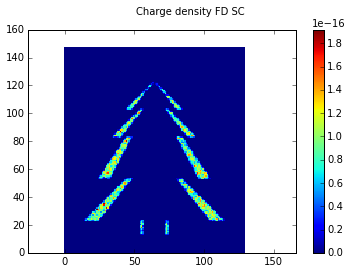

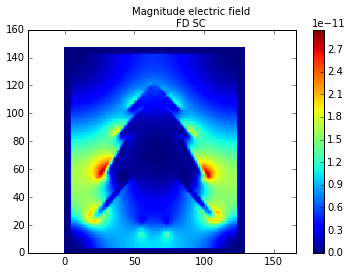

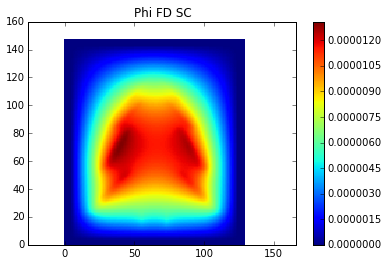

(129, 147)
(129, 147)
(129, 147)


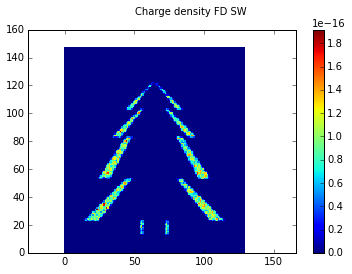

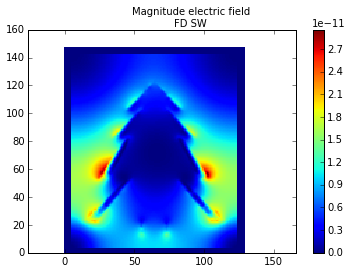

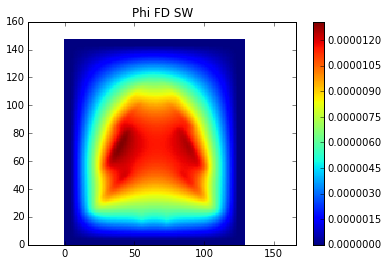

(129, 147)
(129, 147)
(129, 147)


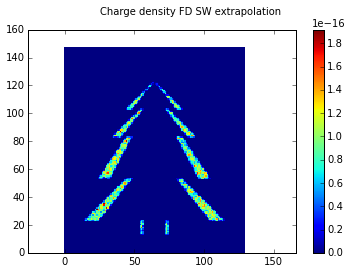

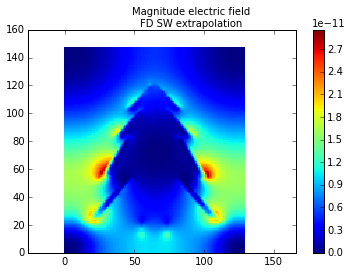

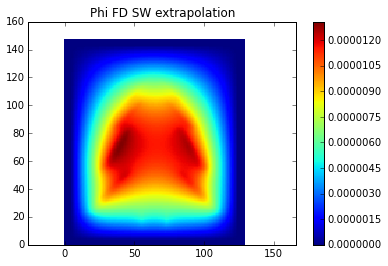

(129, 147)
(129, 147)
(129, 147)


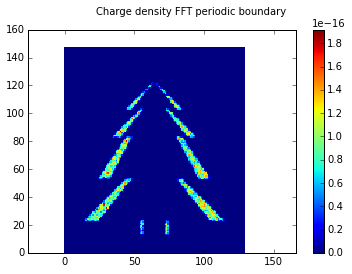

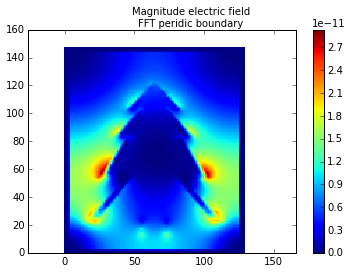

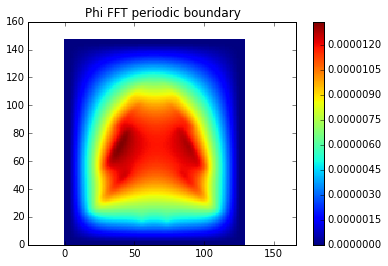

(129, 147)
(129, 147)
(129, 147)


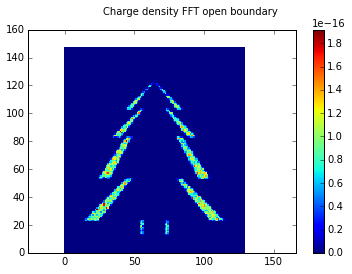

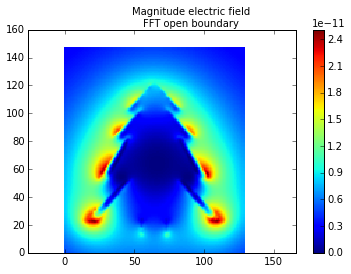

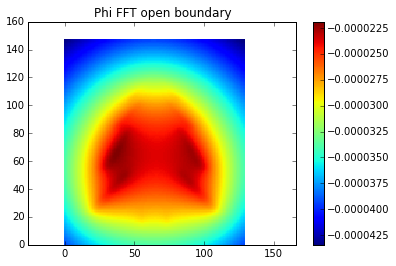

(129, 147)
(129, 147)
(129, 147)


In [6]:
%matplotlib inline
pl.figure()
pl.pcolor(picFDSC.rho.T)
pl.axis('equal')
pl.colorbar()
pl.suptitle('Charge density FD SC')

pl.figure()
pl.pcolor((picFDSC.efx**2+picFDSC.efy**2).T)
pl.axis('equal')
pl.suptitle('Magnitude electric field\nFD SC')
pl.colorbar()


pl.figure()
pl.pcolor(picFDSC.phi.T)
pl.colorbar()
pl.axis('equal')
pl.title('Phi FD SC')
pl.show()

print(picFDSW.phi.shape)
print(picFDSW.efx.shape)
print(picFDSW.efy.shape)

pl.figure()
pl.pcolor(picFDSW.rho.T)
pl.axis('equal')
pl.colorbar()
pl.suptitle('Charge density FD SW')

pl.figure()
pl.pcolor((picFDSW.efx**2+picFDSW.efy**2).T)
pl.axis('equal')
pl.suptitle('Magnitude electric field\nFD SW')
pl.colorbar()


pl.figure()
pl.pcolor(picFDSW.phi.T)
pl.colorbar()
pl.axis('equal')
pl.title('Phi FD SW')
pl.show()


print(picFDSW.phi.shape)
print(picFDSW.efx.shape)
print(picFDSW.efy.shape)

pl.figure()
pl.pcolor(picFDSWE.rho.T)
pl.axis('equal')
pl.colorbar()
pl.suptitle('Charge density FD SW extrapolation')

pl.figure()
pl.pcolor((picFDSWE.efx**2+picFDSWE.efy**2).T)
pl.axis('equal')
pl.suptitle('Magnitude electric field\nFD SW extrapolation')
pl.colorbar()


pl.figure()
pl.pcolor(picFDSWE.phi.T)
pl.colorbar()
pl.axis('equal')
pl.title('Phi FD SW extrapolation')
pl.show()


print(picFDSWE.phi.shape)
print(picFDSWE.efx.shape)
print(picFDSWE.efy.shape)

pl.figure()
pl.pcolor(picFFTP.rho.T)
pl.axis('equal')
pl.colorbar()
pl.suptitle('Charge density FFT periodic boundary')

pl.figure()
pl.pcolor((picFFTP.efx**2+picFFTP.efy**2).T)
pl.axis('equal')
pl.suptitle('Magnitude electric field\nFFT peridic boundary')
pl.colorbar()


pl.figure()
pl.pcolor(picFFTP.phi.T)
pl.colorbar()
pl.axis('equal')
pl.title('Phi FFT periodic boundary')
pl.show()


print(picFFTP.phi.shape)
print(picFFTP.efx.shape)
print(picFFTP.efy.shape)



pl.figure()
pl.pcolor(picFFTO.rho.T)
pl.axis('equal')
pl.colorbar()
pl.suptitle('Charge density FFT open boundary')

pl.figure()
pl.pcolor((picFFTO.efx**2+picFFTO.efy**2).T)
pl.axis('equal')
pl.suptitle('Magnitude electric field\nFFT open boundary')
pl.colorbar()


pl.figure()
pl.pcolor(picFFTO.phi.T)
pl.colorbar()
pl.axis('equal')
pl.title('Phi FFT open boundary')
pl.show()


print(picFFTO.phi.shape)
print(picFFTO.efx.shape)
print(picFFTO.efy.shape)